## Pair Programming EDA III
Es el momento de hacer una buena exploración visual de los datos para entender un poquito mejor el dataset. Para ello trabajaremos con la librería matplotlib y seaborn.


​
Hipótesis


Antes de seguir, recordamos las preguntas que nos planteamos al principio del pair programming de EDA para dirigir nuestro análisis.


Tiempo de resolución: Se podría hipotetizar que los tickets con mayor severidad y prioridad son resueltos en menos días que los tickets con menor prioridad. Además, se podría examinar si hay alguna correlación entre el tipo de problema y el tiempo que toma resolverlo.


La pregunta que contestaremos es: ¿Son los tickets con mayor severidad y prioridad los que se resuelven antes?


Satisfacción del cliente: Se podría hipotetizar que la satisfacción del cliente está relacionada con la velocidad de resolución del ticket y la categoría del problema. Por ejemplo, los clientes podrían estar más satisfechos si sus problemas de acceso y login se resuelven rápidamente en comparación con los problemas de software más complejos.


La pregunta que contestaremos es: ¿Están los clientes con problemas de acceso y login más contentos que los que tienen problemas de software?


Desempeño del agente: Se podría hipotetizar que algunos agentes tienen un mejor desempeño que otros en la resolución de tickets. Se podrían explorar variables como el número de tickets asignados, el tiempo promedio de resolución y la satisfacción del cliente para identificar patrones en el desempeño de los agentes.


La pregunta que contestaremos es: ¿Cuáles son los empleados que más tickets atienden? ¿Son los empleados que atienden más tickets los que tardan más en solucionar los problemas de los clientes? ¿Y la media de la satisfacción de los clientes es menor en aquellos empleados que atienden más solicitudes?


Cambios en el tiempo: Se podría hipotetizar que el volumen y la naturaleza de los problemas cambian con el tiempo. Por ejemplo, se podría explorar si hay un aumento en los problemas de acceso y login durante un determinado período de tiempo, o si hay una correlación entre la temporada del año y el tipo de problema reportado.


La pregunta que contestaremos es: ¿Hay alguna diferencia a lo largo de los años y los meses en la cantidad de solitudes de tickets?



In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


pd.options.display.max_columns = None

In [3]:
import os 

In [4]:
os.getcwd()

'/Users/peris/Desktop/adalab/ejercicios-de-adalab/modulo 2/EDA/EDA3'

In [6]:
df = pd.read_csv("../datos/historico_tickets_limpio_pandas.csv", index_col = 0)

In [7]:
df.head(2)

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
0,GDDENR-5042564453,2016-07-13,1735,4,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,2º semestre,2016,Julio
1,GDDENR-8042508060,2016-05-18,1566,10,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,1 semestre,2016,Mayo



​
Objetivos
En el ejercicio de hoy tendremos que contestar a las siguientes preguntas:
📌 Nota Como siempre, después de cada gráfica incluid una pequeña explicación de lo que nos está mostrando la gráfica.


1. Estableced el tamaño de las figuras al inicio de vuestro jupyter para que todas tengan las mismas dimensiones.


In [8]:
plt.rcParams["figure.figsize"] = (10,8)



2. Manos a la obra con los plots, estos irán muy dirigidos hacia las preguntas que queremos contestar, para hacer una primera aproximación a nuestras hipótesis:



 En la primera gráfica tendremos que contestar la siguiente pregunta: ¿Son los tickets con mayor severidad y prioridad los que se resuelven antes?. 

Para eso tendréis que:


Crear un subplot con dos gráficas.


En la primera gráfica tendréis que mostrar la relación que existe entre la severidad y el tiempo de resolución. ¿Son los tickets que tienen una severidad más alta los que más tardan en resolverse?

En la segunda gráfica tendréis que mostrar la relación que existe entre la prioridad y el tiempo de resolución. ¿Son los tickets que tienen una prioridad más alta los que más tardan en resolverse?


In [9]:
categoricas =  df.select_dtypes(include = "object")

In [10]:
numericas = df.select_dtypes(include = np.number)

In [12]:
categoricas.head(1)

,id_ticket,fecha,categoría,tipo,severidad,prioridad,semestre,mes
0,GDDENR-5042564453,2016-07-13,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,2º semestre,Julio


In [13]:
numericas.head(1)

,id_empleado,id_agente,días_resolución,satisfacción,año
0,1735,4,0,5,2016


decidimos hacer un swarmplot con subplot ya que hay que relacionar categoricas con numericas

In [ ]:
sns.boxplot(  y="b", x= "a", data=df,  orient='v' , ax=axes[0])
sns.boxplot(  y="c", x= "a", data=df,  orient='v' , ax=axes[1])

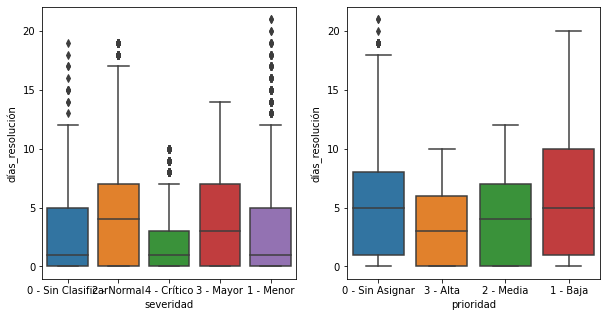

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.boxplot( x='severidad', y='días_resolución', data = df, ax=axes[0])
sns.boxplot( x='prioridad', y='días_resolución', data = df, ax=axes[1])


plt.show();



En la segunda gráfica contestaremos a la siguiente pregunta: ¿Están los clientes con problemas de acceso y login más contentos que los que tienen problemas de software?. Para eso tendréis que:


Crear otro dataframe donde tengáis solo los datos para los datos para los problemas de tipo "Acceso/Login" o "Software".


In [21]:
df.head(5)

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
0,GDDENR-5042564453,2016-07-13,1735,4,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,2º semestre,2016,Julio
1,GDDENR-8042508060,2016-05-18,1566,10,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,1 semestre,2016,Mayo
2,GDDESR-1342539995,2016-06-18,569,29,Sistema,Problema,0 - Sin Clasificar,0 - Sin Asignar,3,5,1 semestre,2016,Junio
3,GDDTSR-5942488006,2016-04-28,320,40,Sistema,Solicitud,0 - Sin Clasificar,0 - Sin Asignar,9,5,1 semestre,2016,Abril
4,GDLEER-0042524120,2016-06-03,1842,31,Software,Problema,2 - Normal,0 - Sin Asignar,0,5,1 semestre,2016,Junio


In [29]:
df_filtro = df[df['categoría'].isin(['Acceso/Login', 'Software'])]
df_filtro.head(2)

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
0,GDDENR-5042564453,2016-07-13,1735,4,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,2º semestre,2016,Julio
1,GDDENR-8042508060,2016-05-18,1566,10,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,1 semestre,2016,Mayo


<AxesSubplot:xlabel='categoría', ylabel='count'>

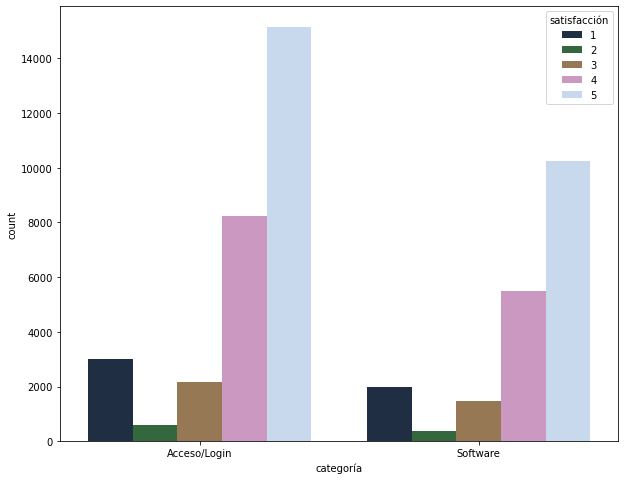

In [35]:
sns.countplot( x = 'categoría', hue='satisfacción', data=df_filtro, palette= 'cubehelix')

<AxesSubplot:xlabel='categoría', ylabel='satisfacción'>

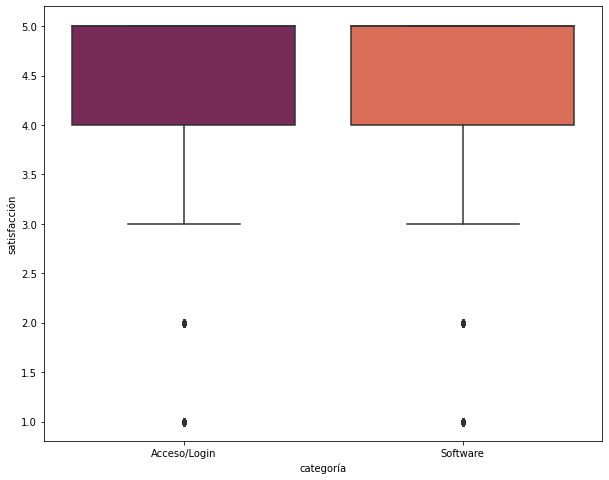

In [31]:
sns.boxplot( x= 'categoría', y = 'satisfacción', data=df_filtro, palette= 'rocket')



Crear una gráfica donde podamos ver la satisfacción de los clientes en función de los problemas filtrados en el paso anterior.




En la tercera gráfica contestaremos a las siguientes preguntas 

¿Cuáles son los empleados que más tickets atienden? 

¿Son los empleados que atienden más tickets los que tardan más en solucionar los problemas de los clientes? 

¿Y la media de la satisfacción de los clientes es menor en aquellos empleados que atienden más solicitudes?. 



Para contestar a esto haremos 3 gráficas independientes:


En la primera gráfica deberemos, 

¿Cuáles son los empleados que más tickets atienden?:
Sacar el número de tickets por empleado. Pista 💡 Para esto tendremos que usar un groupby.




Visualizar el resultado del groupby anterior con la gráfica que sea más adecuada.


En la segunda gráfica, 

¿Son los empleados que atienden más tickets los que tardan más en solucionar los problemas de los clientes?




Deberéis crear una lista donde tengamos los "id's" de los 10 empleados que resuelvan más cantidad tickets y con los 10 empleados que resuelvan menos cantidad de tickets.




Usando la lista generada en el ejercicio anterior filtrad el dataframe para quedaros solo con los 10 seleccionados en el ejercicio anterior.




Una vez tengáis el dataframe filtrado, cread una gráfica donde veamos el tiempo de resolución de solicitudes para cada empleado


En la tercera gráfica, ¿Y la media de la satisfacción de los clientes es menor en aquellos empleados que atienden más solicitudes?:


📌 Usaremos los mismos datos que en la pregunta anterior, el dataframe de los 10 empleados más productivos y menos productivos.




Cread una gráfica donde veamos la satisfacción de los clientes para cada empleado.


Podríamos hacer más gráficas para seguir explorando nuestras hipótesis, pero tenemos el tiempo limitado 😢. Aún así, sentiros libres de explorar todo lo que queráis vuestros datos para entenderlos mejor 😉.
Happy coding 😶‍🌫️